In [9]:
%matplotlib inline

from boututils.datafile import DataFile
from boutdata.collect import collect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import platform
import traceback
import xarray
import xbout
import scipy
import re

onedrive_path = onedrive_path = str(os.getcwd()).split("OneDrive")[0] + "OneDrive"
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\sdtools"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\soledge"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages"))

from hermes3.utils import *

import gridtools.solps_python_scripts.setup
from gridtools.solps_python_scripts.utilities.last10s       import read_last10s

from hermes3.fluxes import *
from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *

from code_comparison.code_comparison import *
from code_comparison.viewer_2d import *


%load_ext autoreload
%autoreload 2

plt.close("all")
%matplotlib inline

print("Done")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Done


# Overview

- I managed to get AFN chained to work and reduced the MFP

# Hermes IO

In [10]:
casestore = dict()

In [11]:
   
db = CaseDB()
toload = [
    dict(name="noafn", id = "d19-noafn_all"),
    dict(name="afn_unchained", id = "d20-d16hf_copy_allbc_afn_unch"),
    dict(name="afn_chained", id = "d20b-allbc_afn_chained"),
    dict(name="afn_chained_mfp5", id = "d20bb-allbc_afnv2_mfp5"),
    dict(name="afn_chained_mfp10", id ="d20bc-allbc_afnv2_mfp10"),
]
casestore = {}
for case in toload:
    casestore[case["name"]] = db.load_case_2D(case["id"], use_squash = True, verbose = True)

- Reading case d19-noafn_all
-----------------------
- Looking for squash file
- Squash file found. squash date 09/25/2023, 15:31:08, dmp file date 09/18/2023, 11:16:19

- Reading case d20-d16hf_copy_allbc_afn_unch
-----------------------
- Looking for squash file
- Squash file found. squash date 09/28/2023, 15:17:26, dmp file date 09/13/2023, 21:23:54

- Reading case d20b-allbc_afn_chained
-----------------------
- Looking for squash file
- Squash file found. squash date 09/28/2023, 15:12:58, dmp file date 09/27/2023, 22:36:06

- Reading case d20bb-allbc_afnv2_mfp5
-----------------------
- Looking for squash file
- Squash file found. squash date 09/28/2023, 15:13:48, dmp file date 09/28/2023, 14:40:38

- Reading case d20bc-allbc_afnv2_mfp10
-----------------------
- Looking for squash file
- Squash file found. squash date 09/28/2023, 15:14:33, dmp file date 09/28/2023, 14:52:16



In [12]:
plt.close("all")
%matplotlib inline

## Read Hermes data

In [13]:
hr = dict()
for hermes_case in casestore.keys(): 
    print(hermes_case)
    hr[hermes_case] = Hermesdata()
    hr[hermes_case].read_case(casestore[hermes_case].ds.isel(t=-1, x = slice(2,-2)))

noafn
afn_unchained
afn_chained
afn_chained_mfp5
afn_chained_mfp10


# Read SOLEDGE CSV data

In [14]:
soledgecases = {
    "tightwall_1e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallMike_bra_nocore_D_1e19"), # Hermes-3 like wall
    "tightwall_2e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallMike_bra_nocore_D_2e19"), # Hermes-3 like wall
    "widewall_2e19_5m" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallStd_bra_nocore_D_2e19_5M"),
    "tightwall_3e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallMike_bra_nocore_D_3e19"), # Hermes-3 like wall
    "widewall_1e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallStd_bra_nocore_D_1e19"), 
    "widewall_2e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallStd_bra_nocore_D_2e19"), 
    "widewall_3e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallStd_bra_nocore_D_3e19"), 
}

sl = dict()

for name in soledgecases:
    path = soledgecases[name]
    sl[name] = SOLEDGEdata(path = path)
    sl[name].read_csv(os.path.join(path, "omp_plasma.csv"), mode = "plot1d_omp")
    sl[name].read_csv(os.path.join(path, "omp_neutrals.csv"), mode = "plot1d_omp")
    sl[name].read_csv(os.path.join(path, "imp_plasma.csv"), mode = "plot1d_imp")
    sl[name].read_csv(os.path.join(path, "imp_neutrals.csv"), mode = "plot1d_imp")
    sl[name].read_csv(os.path.join(path, "wall_ntmpi_plasma.csv"), mode = "wall_ntmpi")



c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astype(np.str)
c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astype(np.str)
c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astype(np.str)
c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astype(np.str)
c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astyp

## Read SOLPS

In [15]:
solpscases = {
    "base" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5"),
    "noiz_core" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16"),
    "gammai_2.5" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.GAMMAI=2.5E+00"),
    "dpuff_1e22" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.D2PUFF=1.0E+22"),
    "dpuff_5e21" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.D2PUFF=5.0E+21"),
    "no_fast_reflec" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.Pf=0"),
    "nsep_2e19" : os.path.join(onedrive_path,r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_core_extent\.core_extent.b2tqca_phm0=0.nesepm=2E+19"),
    "nsep_3e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_core_extent\.core_extent.b2tqca_phm0=0.nesepm=3E+19"),
    "narrow_core" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_core_extent\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.core_extent"),
    "no_visc" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_core_extent\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.core_extent.b2tqca_phm0=0"),
    "16x_mc" : os.path.join(onedrive_path, r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_core_extent\HERMES_SOLEDGE.S33600_Tamb_case.xxx.BCCON=16.core_extent.MC.histories.x16-ish.NOT.converged"),
}

sp = dict()

for name in solpscases:
    sp[name] = SOLPSdata()
    sp[name].read_last10s(solpscases[name])

c:\Users\mikek\OneDrive\Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5\last10s.pkl loaded
c:\Users\mikek\OneDrive\Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16\last10s.pkl loaded
c:\Users\mikek\OneDrive\Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.GAMMAI=2.5E+00\last10s.pkl loaded
c:\Users\mikek\OneDrive\Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.D2PUFF=1.0E+22\last10s.pkl loaded
c:\Users\mikek\OneDrive\Project\collab\tech\co

#  Neutral energy transport

In [7]:
for case in casestore:
    casestore[case].ds = calculate_radial_fluxes(casestore[case].ds)
    casestore[case].ds = reverse_pfr_fluxes(casestore[case].ds)

## OMP

In [28]:
sp.keys()

dict_keys(['base', 'noiz_core', 'gammai_2.5', 'dpuff_1e22', 'dpuff_5e21', 'no_fast_reflec', 'nsep_2e19', 'nsep_3e19', 'narrow_core', 'no_visc', '16x_mc'])

Text(0.5, 1.0, 'Radial heat fluxes at OMP')

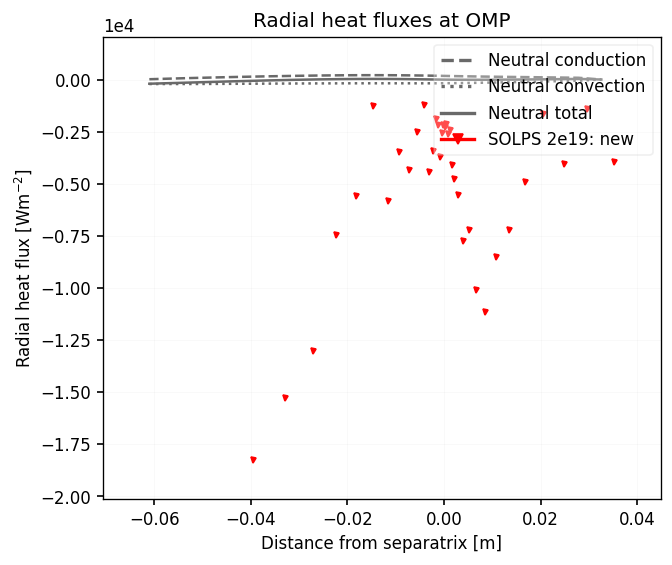

In [111]:
lw = 1

loc = "omp"
neutrals_only = True
ax = None
ds = casestore["noafn"].ds.isel(t=-1)
    
if ds.coords["t"].shape != ():
    raise Exception("Must supply single time slice")

if ax == None:
    fig, ax = plt.subplots()

if loc == "integral":
    d = ds.isel(x=slice(2,-2)).sum("theta")
    print("Integrating poloidally")
    ylabel = "Radial heat flow $[MW]$"
    title = "Whole domain radial heat flow integral"
    scale = 1e-6
elif loc == "omp":
    d = ds.hermesm.select_region("outer_midplane_a").isel(x=slice(2,-2))
    ylabel = "Radial heat flux $[Wm^{-2}]$"
    title = "Radial heat fluxes at OMP"
    scale = 1
elif loc == "imp":    
    d = ds.hermesm.select_region("inner_midplane_a").isel(x=slice(2,-2))
    ylabel = "Radial heat flux $[Wm^{-2}]$"
    title = "Radial heat fluxes at IMP"
    scale = 1
else:
    raise Exception("Location must be omp, imp or integral")

    
omp = ds.hermesm.select_region("outer_midplane_a").isel(x=slice(2,-2))
dist = (omp["R"] - omp["R"][ds.metadata["ixseps1"]])
dist = np.insert(dist.values, 0, dist.values[0] - (dist.values[1] - dist.values[0]))

def append_rhs(x):
    F = d[x].values
    rhs = d[x.replace("_L_", "_R_")][-1].values
    return np.concatenate([F, [rhs]])

m = "o"
ms = 0

area = (d["dpol"] * d["dtor"]).values
area = np.insert(area, -1, area[-1])

# if neutrals_only is False:
#     ax.plot(dist, append_rhs("hf_perp_diff_L_e")*scale, label = "Electron total", marker = m, ms = 0, c = "teal")
#     ax.plot(dist, append_rhs("hf_perp_diff_L_d+")*scale, label = "Ion conduction", marker = m, ms = ms, ls = "--", c = "red")
#     ax.plot(dist, append_rhs("hf_perp_conv_L_d+")*scale, label = "Ion convection", marker = "x",ls = ":", ms = ms, c = "red")
#     ax.plot(dist, append_rhs("hf_perp_tot_L_d+")*scale, label = "Ion total", marker = "|",ls = "-", ms = 0, c = "red")

ax.plot(dist, append_rhs("hf_perp_diff_L_d")*scale/area, label = "Neutral conduction", marker = m, ls = "--", ms = ms, c = "dimgray")
ax.plot(dist, append_rhs("hf_perp_conv_L_d")*scale/area, label = "Neutral convection", marker = "x",ls = ":", ms = ms, c = "dimgray")
ax.plot(dist, append_rhs("hf_perp_tot_L_d")*scale/area, label = "Neutral total", marker = "|",ls = "-", ms = ms, c = "dimgray")



ax.plot(sp["16x_mc"].regions["omp"].index, sp["16x_mc"].regions["omp"]["refluxa3da"]*-1, label = "SOLPS 2e19: new", color = "red", lw=0, marker = "v", ms = 3)


leg = ax.legend(loc = "upper right", bbox_to_anchor = (1,1), fontsize = 10)

for line in leg.get_lines():
    line.set_linewidth(2.0)
# domain["hf_perp_diff_R_d"].plot(ax = ax, label = "Neutral conduction")
# domain["hf_perp_conv_R_d"].plot(ax = ax, label = "Neutral convection")
ax.set_ylabel(ylabel)
ax.set_xlabel("Distance from separatrix [m]")
ax.set_title(title)
# ax.set_ylim(ylim)

In [43]:
len(append_rhs("hf_perp_tot_L_d")*scale)

37

In [42]:
len(area.values)

37

# Test SOLPS output

In [8]:
ft46 = read_file(os.path.join(solpscases["16x_mc"], "fort.46.pkl"))

C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_core_extent\HERMES_SOLEDGE.S33600_Tamb_case.xxx.BCCON=16.core_extent.MC.histories.x16-ish.NOT.converged\fort.46.pkl loaded


In [90]:
ft46.keys()

dict_keys(['pdena', 'pdenm', 'pdeni', 'pdenan', 'edena', 'edenm', 'edeni', 'tdena', 'tdenm', 'tdeni', 'pdenn', 'edenn', 'tdenn', 'vxdena', 'vxdenm', 'vxdeni', 'vydena', 'vydenm', 'vydeni', 'vzdena', 'vzdenm', 'vzdeni', '__comments__'])

In [94]:
solpscases["16x_mc"]

'C:\\Users\\mikek\\OneDrive\\Project\\collab\\tech\\compare_data\\playAround_ST40_IVC2_HERMES_SOLEDGE_core_extent\\HERMES_SOLEDGE.S33600_Tamb_case.xxx.BCCON=16.core_extent.MC.histories.x16-ish.NOT.converged'

b2fgmtry loaded from .pkl
b2fstate loaded from .pkl
b2fplasmf loaded from .pkl
fort.44 loaded from .pkl
fort.46 loaded from .pkl
Triplot triggered
1000000000000000.0 1e+18
Norm: <matplotlib.colors.LogNorm object at 0x000001E0E5B8DD50>
Cbar triggered


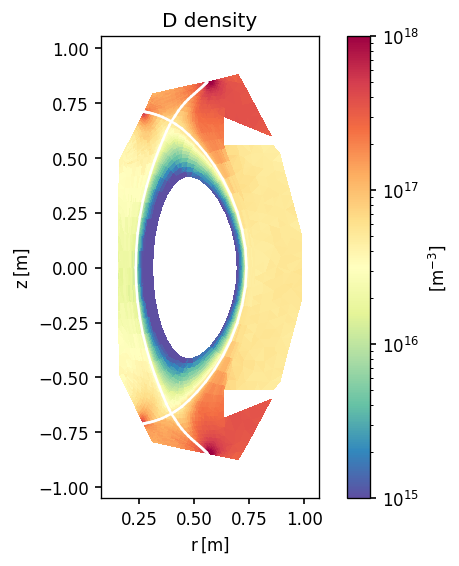

In [97]:
from gridtools.solps_python_scripts.plot_solps import plot_2d

fig, ax = plt.subplots()
plot_2d(fig, ax, where = solpscases["16x_mc"], what = "pdena", vmin = 1e15, vmax = 1e18, cmap = "Spectral_r")

(1, 38, 117)
112 38


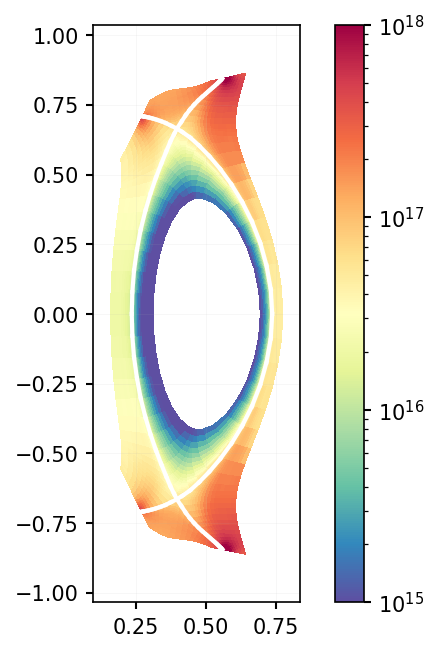

In [100]:
spc.plot_2d("dab2", vmin = 1e15, vmax = 1e18, logscale = True)

## 2D comparison of particle transport

b2fgmtry loaded from .pkl
(1, 38, 117)
112 38


c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astype(np.str)


-1e+22 1e+22


KeyError: 'pf_perp_diff_R_d'

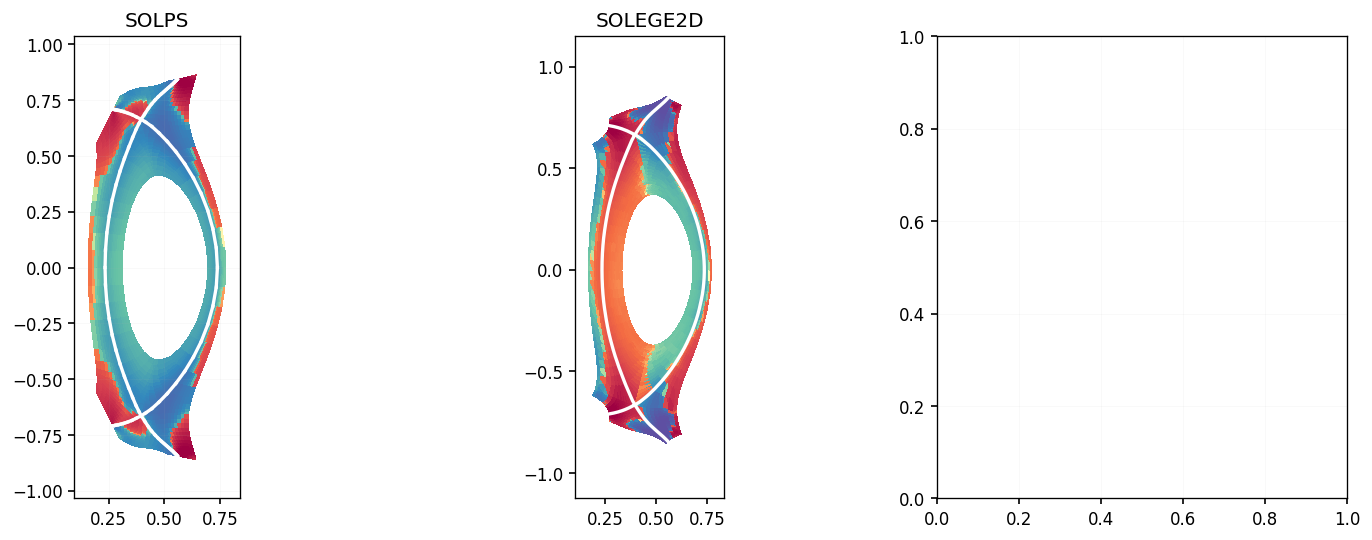

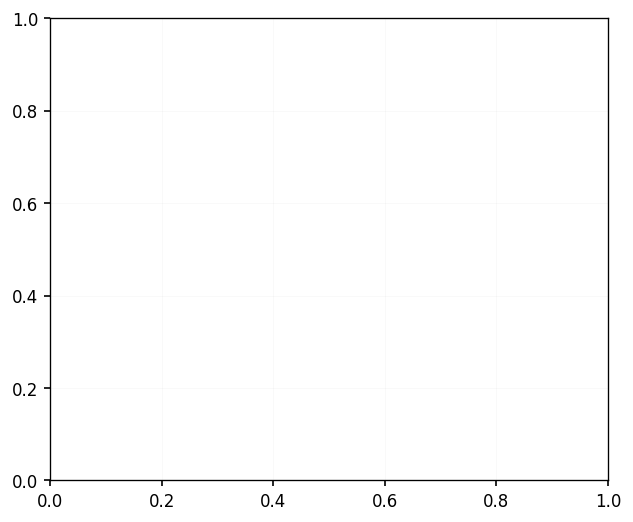

In [17]:
from code_comparison.solps_pp import SOLPScase
spc = SOLPScase(solpscases["16x_mc"])

fig, axes = plt.subplots(1,3, figsize = (15,5), dpi = 120)

vmin = -1e22
vmax = 1e22
logscale = True


# SOLPS
spc.plot_2d("rfluxa", ax = axes[0], vmin = vmin, vmax = vmax, logscale = logscale, cmap = "Spectral_r")
axes[0].set_title("SOLPS")

# SOLEDGE
slc = SOLEDGEcase(soledgecases["tightwall_2e19"])
vxni = slc._get_2d_on_tri("vxni")
na = slc._get_2d_on_tri("Nni")
flux = vxni * na
fig, ax = plt.subplots()
slc.plot_2d(fig, axes[1], data = flux, vmin = vmin, vmax = vmax, logscale = logscale, cmap = "Spectral_r")
axes[1].set_title("SOLEGE2D")

# Hermes-3
ds = casestore["afn_chained_mfp10"].ds.isel(t=-1)
dpol = ds["dy"] * 1/np.sqrt(ds["g_22"])
dtor = ds["dz"] * np.sqrt(ds["g_33"])
da_rad = ds["dy"] * ds["dz"] #dpol * dtor
(ds["pf_perp_diff_R_d"]/da_rad).hermesm.clean_guards().bout.polygon(ax = axes[2], cmap = "Spectral_r", vmin = vmin, vmax = vmax, logscale = logscale)
axes[2].set_title("Hermes-3")



for ax in axes:
    ax.set_ylim(-0.9, 0.1)

# spc.close()

In [20]:
spc.bal["pefluxa"].shape

(1, 38, 117)

In [23]:
spc.bal["crx"].shape

(4, 38, 112)

In [22]:
spc.bal.variables.keys()

dict_keys(['crx', 'cry', 'bb', 'hx', 'hy', 'hz', 'vol', 'gs', 'am', 'mp', 'ev', 'leftix', 'leftiy', 'rightix', 'rightiy', 'topix', 'topiy', 'bottomix', 'bottomiy', 'jxi', 'jxa', 'jsep', 'species', 'b2mndr_eirene', 'b2mndr_hz', 'za', 'fna_pinch', 'fna_pll', 'fna_drift', 'fna_ch', 'fna_nanom', 'fna_panom', 'fna_pschused', 'fna_tot', 'b2stbr_phys_sna_bal', 'b2stbr_bas_sna_bal', 'b2stbr_first_flight_sna_bal', 'b2stbc_sna_bal', 'b2stbm_sna_bal', 'ext_sna_bal', 'b2stel_sna_ion_bal', 'b2stel_sna_rec_bal', 'b2stcx_sna_bal', 'b2srsm_sna_bal', 'b2srdt_sna_bal', 'b2srst_sna_bal', 'tot_sna_bal', 'resco', 'fmo_flua', 'fmo_cvsa', 'fmo_hybr', 'fmo_b2nxfv', 'fmo_tot', 'b2stbr_phys_smo_bal', 'b2stbr_bas_smo_bal', 'b2stbc_smo_bal', 'b2stbm_smo_bal', 'ext_smo_bal', 'b2stel_smq_ion_bal', 'b2stel_smq_rec_bal', 'b2stcx_smq_bal', 'b2srsm_smo_bal', 'b2srdt_smo_bal', 'b2srst_smo_bal', 'b2sifr_smoch_bal', 'b2sifr_smotf_ehxp_bal', 'b2sifr_smotf_cthe_bal', 'b2sifr_smotf_cthi_bal', 'b2sifr_smofrea_bal', 'b2sifr_sm

In [77]:
spc.bal["crx"].shape

(4, 38, 112)

In [ ]:
fr

## 2D comparison of heat transport

b2fgmtry loaded from .pkl


NameError: name 'spc' is not defined

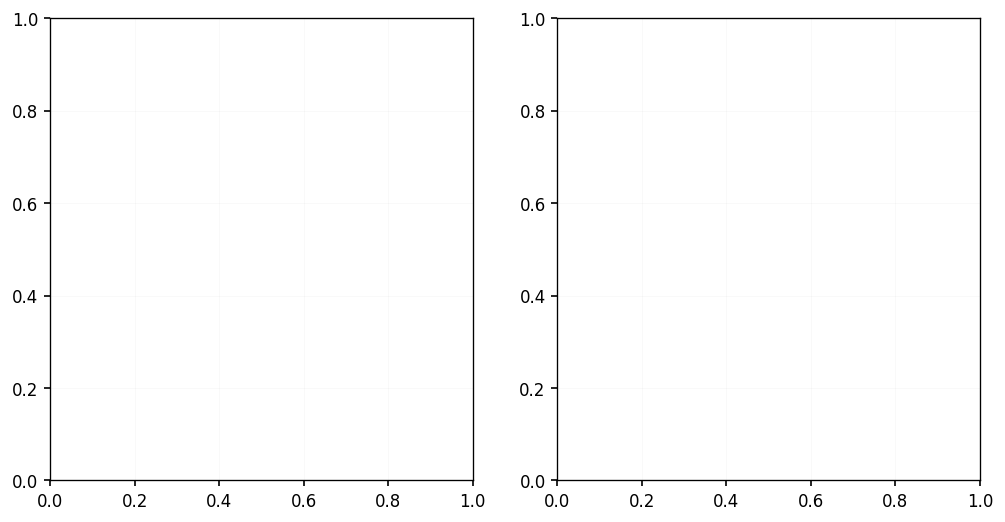

In [16]:
from code_comparison.solps_pp import SOLPScase
sp = SOLPScase(solpscases["16x_mc"])

fig, axes = plt.subplots(1,2, figsize = (10,5), dpi = 120)

vmin = -1e5
vmax = 1e5
logscale = False


# SOLPS
spc.plot_2d("refluxa", ax = axes[0], vmin = vmin, vmax = vmax, logscale = logscale, cmap = "Spectral_r")
axes[0].set_title("SOLPS")

# Hermes-3
ds = casestore["afn_chained_mfp10"].ds.isel(t=-1)
dpol = ds["dy"] * 1/np.sqrt(ds["g_22"])
dtor = ds["dz"] * np.sqrt(ds["g_33"])
da_rad = dpol * dtor
(ds["hf_perp_tot_R_d"]*da_rad).hermesm.clean_guards().bout.polygon(ax = axes[1], cmap = "Spectral_r", vmin = vmin, vmax = vmax, logscale = logscale)
axes[1].set_title("Hermes-3")

# for ax in axes:
#     ax.set_ylim(-0.9, 0.1)

sp.close()

b2fgmtry loaded from .pkl
(1, 38, 117)
112 38
(1, 38, 117)
112 38


C:\Users\mikek\AppData\Local\Temp\ipykernel_27816\873541866.py:21: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(mappable = sm)


(1, 38, 117)
112 38


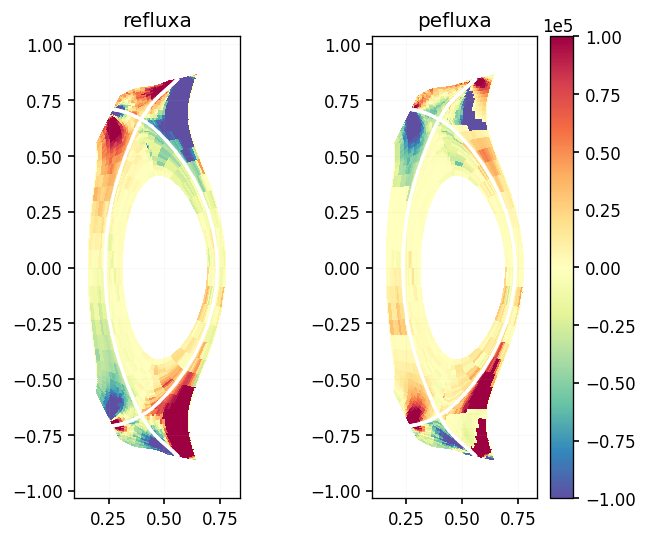

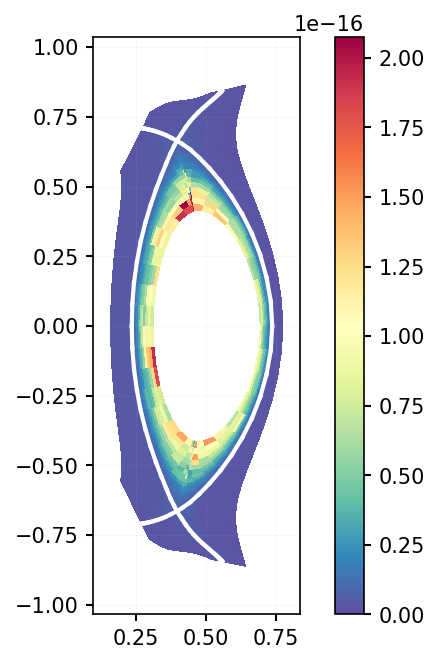

In [31]:
from code_comparison.solps_pp import SOLPScase
sp = SOLPScase(solpscases['nsep_3e19'])

fig, axes = plt.subplots(1,2, figsize = (6,5), dpi = 120)

vmin = -1e5
vmax = 1e5
logscale = False
cmap = "Spectral_r"
norm = create_norm(logscale, None, vmin, vmax)

# SOLPS
sp.plot_2d("refluxa", ax = axes[0], norm = norm, cmap = cmap)
axes[0].set_title("refluxa")

sp.plot_2d("pefluxa", ax = axes[1], norm = norm, cmap = cmap)
axes[1].set_title("pefluxa")

# axes[-1] = fig.add_subplot(gs0a[-1])
sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
cbar = fig.colorbar(mappable = sm)

# Hermes-3
# ds = casestore["afn_chained_mfp10"].ds.isel(t=-1)
# dpol = ds["dy"] * 1/np.sqrt(ds["g_22"])
# dtor = ds["dz"] * np.sqrt(ds["g_33"])
# da_rad = dpol * dtor
# (ds["hf_perp_tot_R_d"]*da_rad).hermesm.clean_guards().bout.polygon(ax = axes[1], cmap = "Spectral_r", vmin = vmin, vmax = vmax, logscale = logscale)
# axes[1].set_title("Hermes-3")

# for ax in axes:
#     ax.set_ylim(-0.9, 0.1)
sp.plot_2d("tab2")
sp.close()

b2fgmtry loaded from .pkl
(1, 38, 117)
112 38


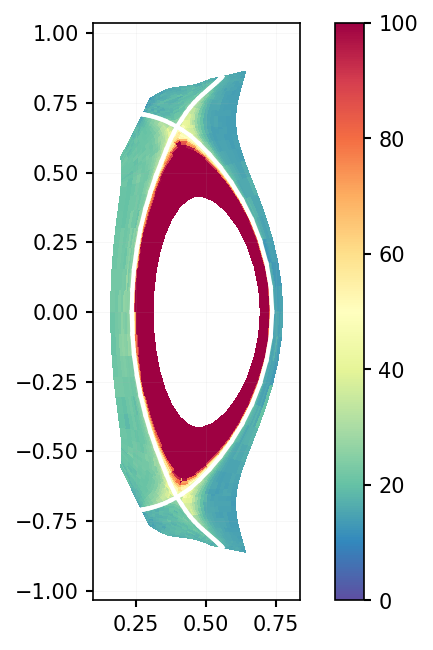

In [45]:
sp = SOLPScase(solpscases['nsep_3e19'])
sp.plot_2d("tab2", data = sp.bal["tab2"][:]/constants("q_e"), logscale = False, vmax = 100)
sp.close()

b2fgmtry loaded from .pkl
(1, 38, 117)
112 38
(1, 38, 117)
112 38


C:\Users\mikek\AppData\Local\Temp\ipykernel_27816\4020551933.py:21: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(mappable = sm)


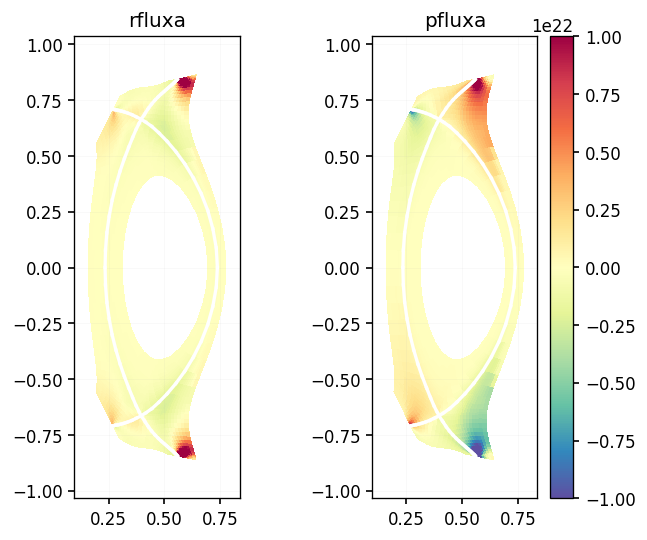

In [27]:
from code_comparison.solps_pp import SOLPScase
sp = SOLPScase(solpscases["16x_mc"])

fig, axes = plt.subplots(1,2, figsize = (6,5), dpi = 120)

vmin = -1e22
vmax = 1e22
logscale = False
cmap = "Spectral_r"
norm = create_norm(logscale, None, vmin, vmax)

# SOLPS
sp.plot_2d("rfluxa", ax = axes[0], norm = norm, cmap = cmap)
axes[0].set_title("rfluxa")

sp.plot_2d("pfluxa", ax = axes[1], norm = norm, cmap = cmap)
axes[1].set_title("pfluxa")

# axes[-1] = fig.add_subplot(gs0a[-1])
sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
cbar = fig.colorbar(mappable = sm)

# Hermes-3
# ds = casestore["afn_chained_mfp10"].ds.isel(t=-1)
# dpol = ds["dy"] * 1/np.sqrt(ds["g_22"])
# dtor = ds["dz"] * np.sqrt(ds["g_33"])
# da_rad = dpol * dtor
# (ds["hf_perp_tot_R_d"]*da_rad).hermesm.clean_guards().bout.polygon(ax = axes[1], cmap = "Spectral_r", vmin = vmin, vmax = vmax, logscale = logscale)
# axes[1].set_title("Hermes-3")

# for ax in axes:
#     ax.set_ylim(-0.9, 0.1)

sp.close()

## Looking at the fluxes across domain

In [28]:
casestore.keys()

dict_keys(['noafn', 'afn_unchained', 'afn_chained', 'afn_chained_mfp5', 'afn_chained_mfp10'])

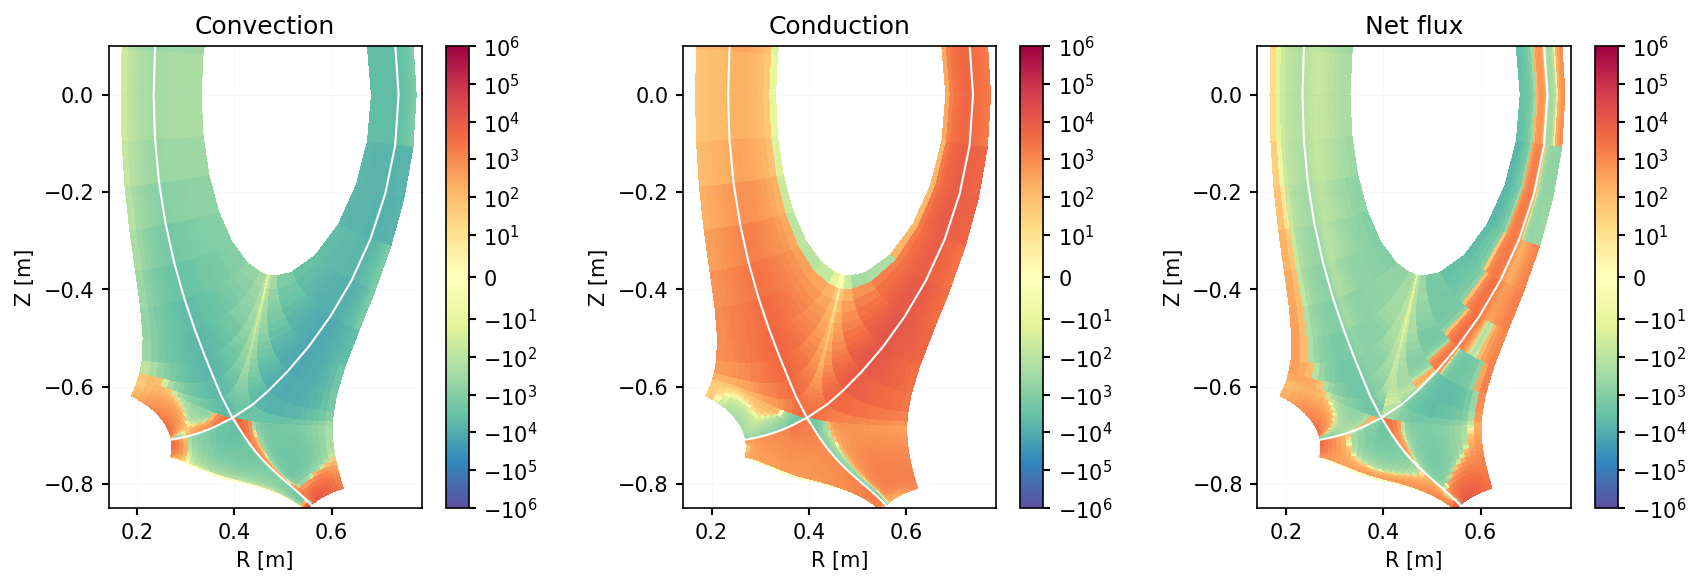

In [54]:
ds = casestore["noafn"].ds.isel(t = -1)

fig, axes = plt.subplots(1,3, figsize = (14, 4), dpi = 150)

net_flux = ds["hf_perp_conv_L_d"] + ds["hf_perp_diff_L_d"]


ds["hf_perp_conv_L_d"].hermesm.clean_guards().bout.polygon(ax = axes[0], cmap = "Spectral_r", logscale = True, vmin = -1e6, vmax = 1e6)
axes[0].set_title("Convection")

ds["hf_perp_diff_L_d"].hermesm.clean_guards().bout.polygon(ax = axes[1], cmap = "Spectral_r", logscale = True, vmin = -1e6, vmax = 1e6)
axes[1].set_title("Conduction")

net_flux.hermesm.clean_guards().bout.polygon(ax = axes[2], cmap = "Spectral_r", logscale = True, vmin = -1e6, vmax = 1e6)
axes[2].set_title("Net flux")

for ax in axes:
    ax.set_ylim(-0.85, 0.1)

In [ ]:
# Total energy flux 

In [55]:
casestore.keys()

dict_keys(['noafn', 'afn_unchained', 'afn_chained', 'afn_chained_mfp5', 'afn_chained_mfp10'])

# Total energy flux

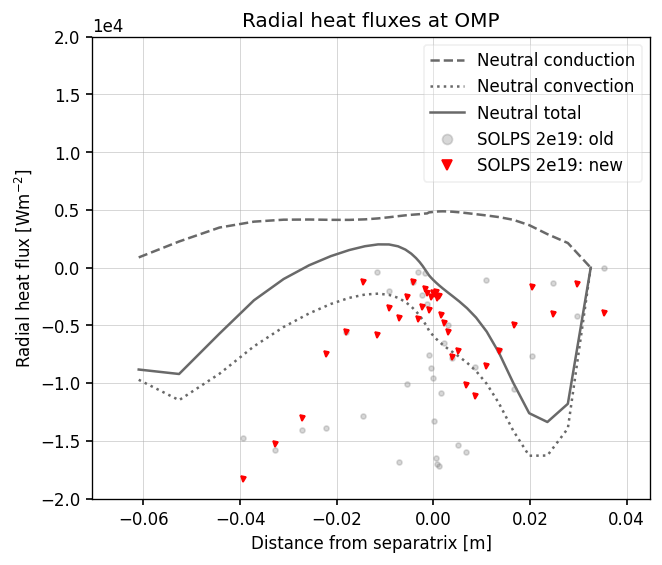

In [120]:
fig, ax = plt.subplots()
plot_perp_heat_fluxes(casestore["afn_chained_mfp10"].ds.isel(t=-1), ax = ax, loc = "omp", ylim=(-2e4, 2e4), neutrals_only = True)

ax.plot(sp["nsep_2e19"].regions["omp"].index, sp["nsep_2e19"].regions["omp"]["refluxa3da"]*-1, label = "SOLPS 2e19: old", color = "grey", lw=0, marker = "o", ms = 3, alpha = 0.3)
ax.plot(sp["16x_mc"].regions["omp"].index, sp["16x_mc"].regions["omp"]["refluxa3da"]*-1, label = "SOLPS 2e19: new", color = "red", lw=0, marker = "v", ms = 3)

ax.legend()
ax.grid(alpha = 1)

# PARTICLE FLUX

In [51]:
sp.keys()

dict_keys(['base', 'noiz_core', 'gammai_2.5', 'dpuff_1e22', 'dpuff_5e21', 'no_fast_reflec', 'nsep_2e19', 'nsep_3e19', 'narrow_core', 'no_visc', '16x_mc'])

In [97]:
for case in casestore:
    casestore[case].ds = calculate_radial_fluxes(casestore[case].ds)
    casestore[case].ds = reverse_pfr_fluxes(casestore[case].ds)

Text(0.5, 1.0, '')

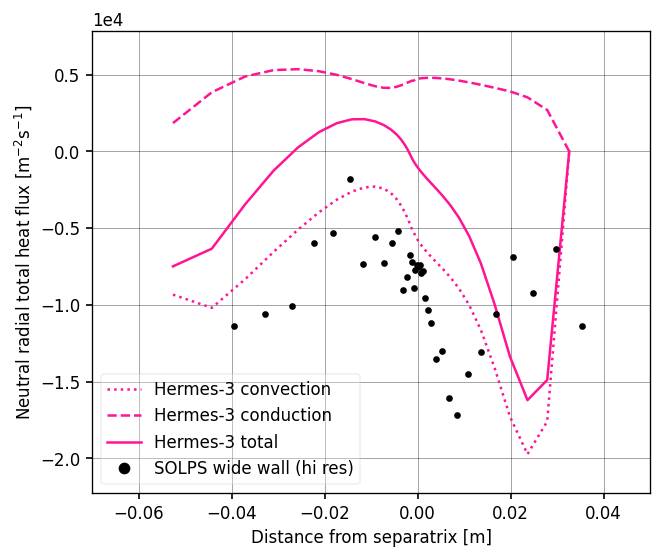

In [135]:
# ds = casestore["fixTn"].ds.isel(t=-1)
# d = ds.isel(x=slice(2,-2)).sum("theta")
# omp = ds.hermesm.select_region("outer_midplane_a").isel(x=slice(2,-2))

# dist = (omp["R"] - omp["R"][ds.metadata["ixseps1"]])
# ax.plot(dist, omp["hf_perp_tot_R_d"] / (omp["dy"]*omp["dz"]), label = "Hermes-3 Tn=30")



fig, ax = plt.subplots()
labels = ['noafn', 'afn_unchained', 'afn_chained', 'afn_chained_mfp5', 'afn_chained_mfp10']

for i, case in enumerate(["afn_chained_mfp10"]):
    
    ds = casestore[case].ds.isel(t=-1)
    d = ds.isel(x=slice(2,-2)).sum("theta")
    omp = ds.hermesm.select_region("outer_midplane_a").isel(x=slice(2,-2))
    dist = (omp["R"] - omp["R"][ds.metadata["ixseps1"]])
    ax.plot(dist, omp["hf_perp_conv_R_d"] / (omp["dy"]*omp["dz"]), label = "Hermes-3 convection", color = "deeppink", ls = ":")
    ax.plot(dist, omp["hf_perp_diff_R_d"] / (omp["dy"]*omp["dz"]), label = "Hermes-3 conduction", color = "deeppink", ls = "--")
    ax.plot(dist, omp["hf_perp_tot_R_d"] / (omp["dy"]*omp["dz"]), label = "Hermes-3 total", color = "deeppink", ls = "-")
    # ax.plot(dist, omp["pf_perp_diff_R_d"] / (omp["dpol"]*omp["dtor"]), label = case, color = "deeppink")

# ax2 = ax.twinx()
# ax2.plot(dist, omp["particle_flux_factor_d"])

# SOLPS
# ax.plot(sp["nsep_2e19"].regions["omp"].index, sp["nsep_2e19"].regions["omp"]["pfluxa3da"] * -1, label = "SOLPS wide wall (lo res)", color = "black", lw=0, marker = "o", ms = 3)
ax.plot(sp["16x_mc"].regions["omp"].index, sp["16x_mc"].regions["omp"]["pefluxa3da"] * -1, label = "SOLPS wide wall (hi res)", color = "black", lw=0, marker = "o", ms = 3)

# SOLEDGE
# slc = SOLEDGEcase(path = soledgecases["tightwall_2e19"])
# df = slc.get_1d_radial_data(["vxni", "Nni", "Tni"])
# df["NVxn"] = df["vxni"] * (df["Nni"] * df["Tni"])*2/3
# ax.plot(df["dist"], df["NVxn"], lw=0, marker = "x", ms = 5, markeredgewidth=1.5, label = "SOLEDGE tight wall", c = "teal")

# slc = SOLEDGEcase(path = soledgecases["widewall_2e19"])
# df = slc.get_1d_radial_data(["vxni", "Nni"])
# df["NVxn"] = df["vxni"] * df["Nni"]
# ax.plot(df["dist"], df["NVxn"], lw=0, marker = "x", ms = 5, markeredgewidth=1.5, label = "SOLEDGE wide wall", c = "darkorange")

ax.set_ylabel("Neutral radial total heat flux $[m^{-2}s^{-1}]$")
ax.set_xlabel("Distance from separatrix [m]")
ax.legend()
ax.set_xlim(-0.07, 0.05)
# ax.set_ylim(-4.5e20, 1e20)
ax.grid(alpha=0.7, c = "k")
ax.set_title("")

c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astype(np.str)


Text(0.5, 1.0, '')

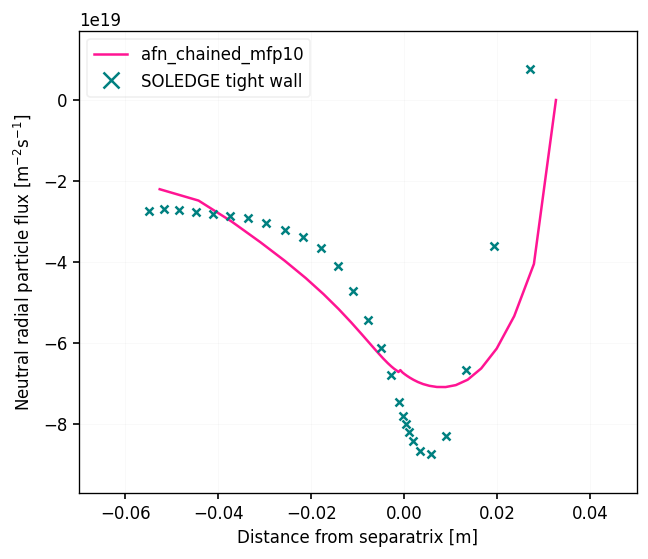

In [119]:
# ds = casestore["fixTn"].ds.isel(t=-1)
# d = ds.isel(x=slice(2,-2)).sum("theta")
# omp = ds.hermesm.select_region("outer_midplane_a").isel(x=slice(2,-2))

# dist = (omp["R"] - omp["R"][ds.metadata["ixseps1"]])
# ax.plot(dist, omp["hf_perp_tot_R_d"] / (omp["dy"]*omp["dz"]), label = "Hermes-3 Tn=30")



fig, ax = plt.subplots()
labels = ['noafn', 'afn_unchained', 'afn_chained', 'afn_chained_mfp5', 'afn_chained_mfp10']

for i, case in enumerate(["afn_chained_mfp10"]):
    
    ds = casestore[case].ds.isel(t=-1)
    d = ds.isel(x=slice(2,-2)).sum("theta")
    omp = ds.hermesm.select_region("outer_midplane_a").isel(x=slice(2,-2))
    dist = (omp["R"] - omp["R"][ds.metadata["ixseps1"]])
    ax.plot(dist, omp["pf_perp_diff_R_d"] / (omp["dy"]*omp["dz"]), label = case, color = "deeppink")
    # ax.plot(dist, omp["pf_perp_diff_R_d"] / (omp["dpol"]*omp["dtor"]), label = case, color = "deeppink")

# ax2 = ax.twinx()
# ax2.plot(dist, omp["particle_flux_factor_d"])

# SOLPS
# ax.plot(sp["nsep_2e19"].regions["omp"].index, sp["nsep_2e19"].regions["omp"]["pfluxa3da"] * -1, label = "SOLPS wide wall (lo res)", color = "black", lw=0, marker = "o", ms = 3)
# ax.plot(sp["16x_mc"].regions["omp"].index, sp["16x_mc"].regions["omp"]["pfluxa3da"] * -1, label = "SOLPS wide wall (hi res)", color = "grey", lw=0, marker = "o", ms = 3)

# SOLEDGE
slc = SOLEDGEcase(path = soledgecases["tightwall_2e19"])
df = slc.get_1d_radial_data(["vxni", "Nni"])
df["NVxn"] = df["vxni"] * df["Nni"]
ax.plot(df["dist"], df["NVxn"], lw=0, marker = "x", ms = 5, markeredgewidth=1.5, label = "SOLEDGE tight wall", c = "teal")

# slc = SOLEDGEcase(path = soledgecases["widewall_2e19"])
# df = slc.get_1d_radial_data(["vxni", "Nni"])
# df["NVxn"] = df["vxni"] * df["Nni"]
# ax.plot(df["dist"], df["NVxn"], lw=0, marker = "x", ms = 5, markeredgewidth=1.5, label = "SOLEDGE wide wall", c = "darkorange")

ax.set_ylabel("Neutral radial particle flux $[m^{-2}s^{-1}]$")
ax.set_xlabel("Distance from separatrix [m]")
ax.legend()
ax.set_xlim(-0.07, 0.05)
# ax.set_ylim(-4.5e20, 1e20)
ax.set_title("")